In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [6]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

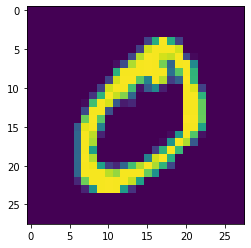

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])

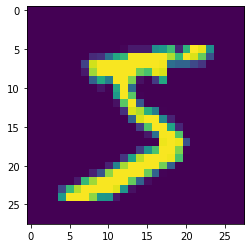

In [9]:
plt.imshow(X_train[0])

In [10]:
# COnverting data into same range between 0-1
# Dividing by 255
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Creating ANN For MIST dataset

In [31]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [34]:
history = model.fit(X_train,y_train,validation_split=0.2, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.2836 - accuracy: 0.9169 - val_loss: 0.1310 - val_accuracy: 0.9625
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1156 - accuracy: 0.9651 - val_loss: 0.1099 - val_accuracy: 0.9669
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0797 - accuracy: 0.9754 - val_loss: 0.1280 - val_accuracy: 0.9646
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0617 - accuracy: 0.9801 - val_loss: 0.1096 - val_accuracy: 0.9705
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9855 - val_loss: 0.1029 - val_accuracy: 0.9703
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0404 - accuracy: 0.9871 - val_loss: 0.1169 - val_accuracy: 0.9712
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0315 - accuracy: 0.9893 - val_loss: 0.1001 - val_accuracy:

In [35]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [36]:
# Taking max values index out of 10 output
y_pred = y_prob.argmax(axis=1)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9764

In [28]:
import matplotlib.pyplot as plt


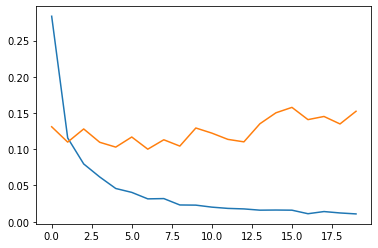

In [38]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

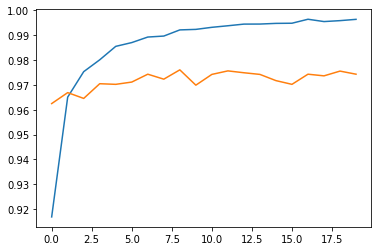

In [39]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

- Observation:
    1. Clearly indication of overfitting

In [40]:
# Taking single example to predict values

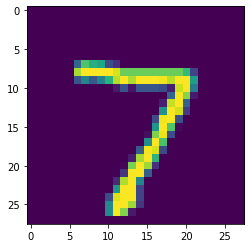

In [41]:
plt.imshow(X_test[0])

In [43]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 32ms/step


array([7], dtype=int64)

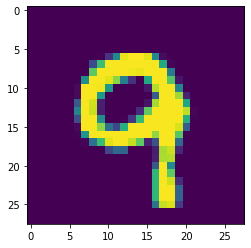

In [44]:
# Second case
plt.imshow(X_test[99])

In [45]:
model.predict(X_test[99].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 48ms/step


array([9], dtype=int64)